In [1]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Testing matplotlib interactions with a simple plot
fig = plt.figure()
plt.plot(np.sin(np.linspace(0, 20, 100)));

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [3]:
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False # Hide the Figure name at the top of the figure

In [4]:
fig.canvas.footer_visible = False

In [5]:
fig.canvas.resizable = False

In [6]:
fig.canvas.capture_scroll = True

In [7]:
fig.canvas.toolbar_visible = True
display(fig.canvas)

Canvas(capture_scroll=True, footer_visible=False, header_visible=False, resizable=False, toolbar=Toolbar(tooli…

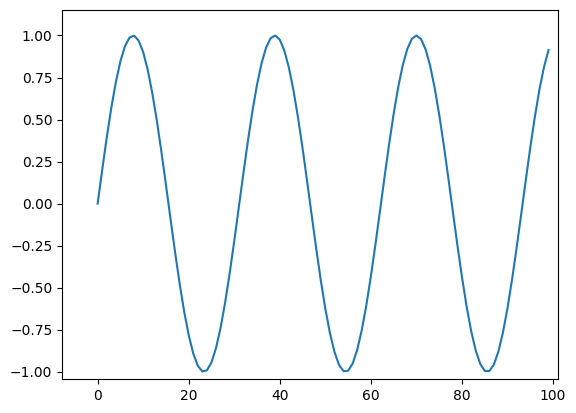

In [8]:

display(fig)

In [9]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [10]:
# A more complex example from the matplotlib gallery
np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:

import ipywidgets as widgets

# ensure we are interactive mode 
# this is default but if this notebook is executed out of order it may have been turned off
plt.ion()


fig = plt.figure()
ax = fig.gca()
ax.imshow(Z)

widgets.AppLayout(
    center=fig.canvas,
    footer=widgets.Button(icon='check'),
    pane_heights=[0, 6, 1]
)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

AppLayout(children=(Button(icon='check', layout=Layout(grid_area='footer'), style=ButtonStyle()), Canvas(layou…

In [12]:
plt.ioff()
fig = plt.figure()
plt.ion()

ax = fig.gca()
ax.imshow(Z)

widgets.AppLayout(
    center=fig.canvas,
    footer=widgets.Button(icon='check'),
    pane_heights=[0, 6, 1]
)

AppLayout(children=(Button(icon='check', layout=Layout(grid_area='footer'), style=ButtonStyle()), Canvas(layou…

In [13]:
out = widgets.Output()
with out:
    fig = plt.figure()

ax = fig.gca()
ax.imshow(Z)

widgets.AppLayout(
    center=out,
    footer=widgets.Button(icon='check'),
    pane_heights=[0, 6, 1]
)

AppLayout(children=(Button(icon='check', layout=Layout(grid_area='footer'), style=ButtonStyle()), Output(layou…

In [14]:
# When using the `widget` backend from ipympl,
# fig.canvas is a proper Jupyter interactive widget, which can be embedded in
# an ipywidgets layout. See https://ipywidgets.readthedocs.io/en/stable/examples/Layout%20Templates.html

# One can bound figure attributes to other widget values.
from ipywidgets import AppLayout, FloatSlider

plt.ioff()

slider = FloatSlider(
    orientation='horizontal',
    description='Factor:',
    value=1.0,
    min=0.02,
    max=2.0
)

slider.layout.margin = '0px 30% 0px 30%'
slider.layout.width = '40%'

fig = plt.figure()
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title('Plotting: y=sin({} * x)'.format(slider.value))

x = np.linspace(0, 20, 500)

lines = plt.plot(x, np.sin(slider.value * x))

def update_lines(change):
    plt.title('Plotting: y=sin({} * x)'.format(change.new))
    lines[0].set_data(x, np.sin(change.new * x))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)

AppLayout(children=(FloatSlider(value=1.0, description='Factor:', layout=Layout(grid_area='footer', margin='0p…

In [15]:
# precomputing all images
x = np.linspace(0,np.pi,200)
y = np.linspace(0,10,200)
X,Y = np.meshgrid(x,y)
parameter = np.linspace(-5,5)
example_image_stack = np.sin(X)[None,:,:]+np.exp(np.cos(Y[None,:,:]*parameter[:,None,None]))

In [16]:
plt.ioff()
fig = plt.figure()
plt.ion()
im = plt.imshow(example_image_stack[0])

def update(change):
    im.set_data(example_image_stack[change['new']])
    fig.canvas.draw_idle()
    
    
slider = widgets.IntSlider(value=0, min=0, max=len(parameter)-1)
slider.observe(update, names='value')
widgets.VBox([slider, fig.canvas])

In [17]:
plt.ioff()
fig = plt.figure()
plt.ion()
im = plt.imshow(example_image_stack[0])

out = widgets.Output()
@out.capture()
def update(change):
    with out:
        if change['name'] == 'value':
            im.set_data(example_image_stack[change['new']])
            fig.canvas.draw_idle
    
    
slider = widgets.IntSlider(value=0, min=0, max=len(parameter)+10)
slider.observe(update)
display(widgets.VBox([slider, fig.canvas]))
display(out)

Output()